## Simple Linear Regression (SLR) - Odometer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('Odometer.csv')
df1[:5]

,Odometer,Price
0,37.4,14.6
1,44.8,14.1
2,45.8,14.0
3,30.9,15.6
4,31.7,15.6


In [3]:
# Target variable (response) is Price
# Odometer is predictor

In [4]:
Price = df1.Price
Odometer = df1["Odometer"]

### Coefficient of correlation r

In [5]:
# Correlation between Price and Odometer (both must be Series)

In [6]:
r = Price.corr(Odometer)
r

-0.8051679793300429

In [7]:
# this is medium to high correlation

In [8]:
# Predictor(s) must be in a DataFrame

In [9]:
Odometer = pd.DataFrame(Odometer)

## model 1 - sklearn library

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
m1 = LinearRegression().fit(Odometer,Price)

In [12]:
# intercept and slope

In [13]:
m1.intercept_

17.24872734291551

In [14]:
m1.coef_

array([-0.06686089])

In [15]:
# price decreases by 0.06686 dollars for each additional mile

In [16]:
# m1.intercept_ is a float number
# m1.coef_ is an array

R-squared

In [17]:
m1.score(Odometer,Price)

0.6482954749384247

In [18]:
# model m1 explains 64.83% of price variability, or
# 64.83% variability of car prices is explained by Odometer readings

Square of coefficient of Correlation

In [19]:
r**2

0.6482954749384244

In [20]:
# which is equal to R-Square

### Prediction

In [21]:
newval = pd.DataFrame([40],columns = ['Odometer'])
newval

,Odometer
0,40


In [22]:
m1.predict(newval)

array([14.57429193])

In [23]:
# Estimated average Price of a car with 40 miles Odometer reading

### scatterplot -using Matplotlib

In [24]:
# predict price for all Odometer values in df1

In [25]:
yhat = m1.predict(Odometer)

In [26]:
df2 = df1.copy()
df2['prediction'] = yhat
df2[:5]

,Odometer,Price,prediction
0,37.4,14.6,14.748130
1,44.8,14.1,14.253360
2,45.8,14.0,14.186499
3,30.9,15.6,15.182726
4,31.7,15.6,15.129237


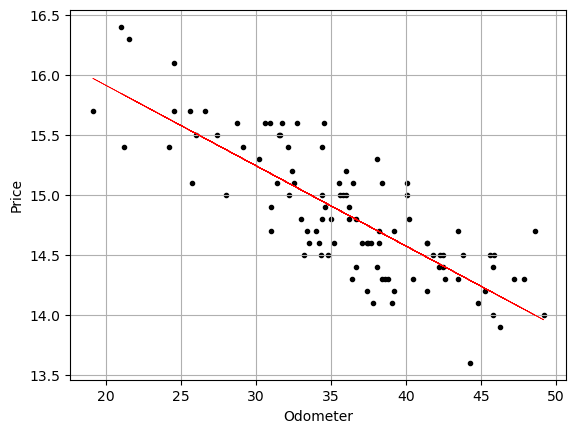

In [27]:
plt.figure()
plt.scatter(Odometer,Price,c='k',s=9)
# add regression line
plt.plot(Odometer,yhat,color = 'r',linewidth = 0.5)
plt.ylabel('Price')
plt.xlabel('Odometer')
plt.grid()

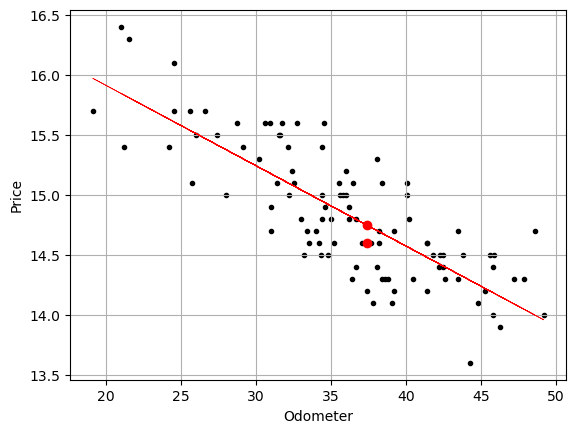

In [28]:
# Mark first data point

plt.figure()
plt.scatter(Odometer,Price,c='k',s=9)
# add regression line
plt.plot(Odometer,yhat,color = 'r',linewidth = 0.5)
plt.ylabel('Price')
plt.xlabel('Odometer')
# mark point
plt.scatter(Odometer.iloc[0],Price[0],c='r')
plt.scatter(Odometer.iloc[0],yhat[0],color = 'r')
plt.grid()

## method 2 - statsmodels.formula.api

In [29]:
import statsmodels.formula.api as smf

In [30]:
m2 = smf.ols(formula = 'Price ~ Odometer',data = df1).fit() 
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     180.6
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           5.75e-24
Time:                        18:36:37   Log-Likelihood:                -28.948
No. Observations:                 100   AIC:                             61.90
Df Residuals:                      98   BIC:                             67.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.2487      0.182     94.725      0.000      16.887      17.610
Odometer      -0.0669      0.005    -13.440      0.000      -0.077      -0.057
==============================================================================
Omnibus:                        5.847   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                2.691
Skew:                           0.042   Prob(JB):                        0.260
Kurtosis:                       2.201   Cond. No.                         204.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
m2.params

Intercept    17.248727
Odometer     -0.066861
dtype: float64

In [32]:
m2.rsquared

0.6482954749384244

In [33]:
m2.rsquared_adj

0.6447066532541227

### Prediction

In [34]:
newval = pd.DataFrame([40],columns = ['Odometer'])
newval

,Odometer
0,40


In [35]:
m2.predict(newval)

0    14.574292
dtype: float64

## method 3 - statsmodels.api

In [36]:
import statsmodels.api as sm

In [37]:
# statsmodels.api requires predictors array with column of ones

In [38]:
Odometer1 = Odometer.copy()
Odometer1.insert(0,'const',1)
Odometer1[:4]

,const,Odometer
0,1,37.4
1,1,44.8
2,1,45.8
3,1,30.9


In [39]:
m3 = sm.OLS(Price,Odometer1).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     180.6
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           5.75e-24
Time:                        18:36:37   Log-Likelihood:                -28.948
No. Observations:                 100   AIC:                             61.90
Df Residuals:                      98   BIC:                             67.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.2487      0.182     94.725      0.000      16.887      17.610
Odometer      -0.0669      0.005    -13.440      0.000      -0.077      -0.057
==============================================================================
Omnibus:                        5.847   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                2.691
Skew:                           0.042   Prob(JB):                        0.260
Kurtosis:                       2.201   Cond. No.                         204.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Fitted equation

In [40]:
# E[Price 000s] = 17.2487 -0.067*(Odometer reading in 000s)

### Prediction with CI and PI

In [41]:
# predict price of used cars with 30 and 40 miles

In [66]:
newval = sm.add_constant([40,30])
newval

array([[ 1., 40.],
       [ 1., 30.]])

In [67]:
m3.predict(newval)

array([14.57429193, 15.24290078])

In [68]:
# Use get_prediction() for 96% CIs and PIs

In [69]:
predictions = m3.get_prediction(newval)
predictions.summary_frame(alpha = 0.04)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,14.574292,0.038206,14.494767,14.653816,13.890087,15.258497
1,15.242901,0.044273,15.150749,15.335053,14.557113,15.928689


In [46]:
# Predictions in column mean
# Standard deviation of predictions in column mean_se
# PIs in the last two columns

### ANOVA Table

In [47]:
# Must use sm with model m2

In [48]:
table1 = sm.stats.anova_lm(m2)
table1

,df,sum_sq,mean_sq,F,PR(>F)
Odometer,1.0,19.255607,19.255607,180.642989,5.750781e-24
Residual,98.0,10.446293,0.106595,NaN,NaN


In [49]:
# last row shows SSE and MSE

In [50]:
mse = table1.iloc[1,2]
mse

0.10659482278496338

### Standard error of the estimate S

In [51]:
S = np.sqrt(mse)
S

0.326488625812544

In [52]:
# this is the average distance to the fitted line -smaller is better

## Confidence and Prediction bands

In [53]:
# predict prices of cars with Odometer readings between 10 to 60

In [54]:
xaxis = range(10,60)

In [55]:
newval = pd.DataFrame()
newval['Odometer'] = range(10,60)
newval.insert(0,'constant',1)
newval[:5]

,constant,Odometer
0,1,10
1,1,11
2,1,12
3,1,13
4,1,14


In [56]:
# CI and PI for Odometer values in range 10 to 60

In [57]:
d2 = m3.get_prediction(newval)
d2.summary_frame()[:5]

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,16.580118,0.133451,16.315290,16.844947,15.880178,17.280059
1,16.513258,0.128633,16.257990,16.768526,15.816878,17.209637
2,16.446397,0.123828,16.200665,16.692129,15.753456,17.139337
3,16.379536,0.119036,16.143312,16.615760,15.689910,17.069162
4,16.312675,0.114261,16.085928,16.539421,15.626238,16.999112


### Plot bands

In [58]:
# select columns from d2

In [59]:
predictions = d2.summary_frame()['mean']
ci_lwr = d2.summary_frame().mean_ci_lower
ci_upr = d2.summary_frame().mean_ci_upper
pi_lwr = d2.summary_frame().obs_ci_lower
pi_upr = d2.summary_frame().obs_ci_upper

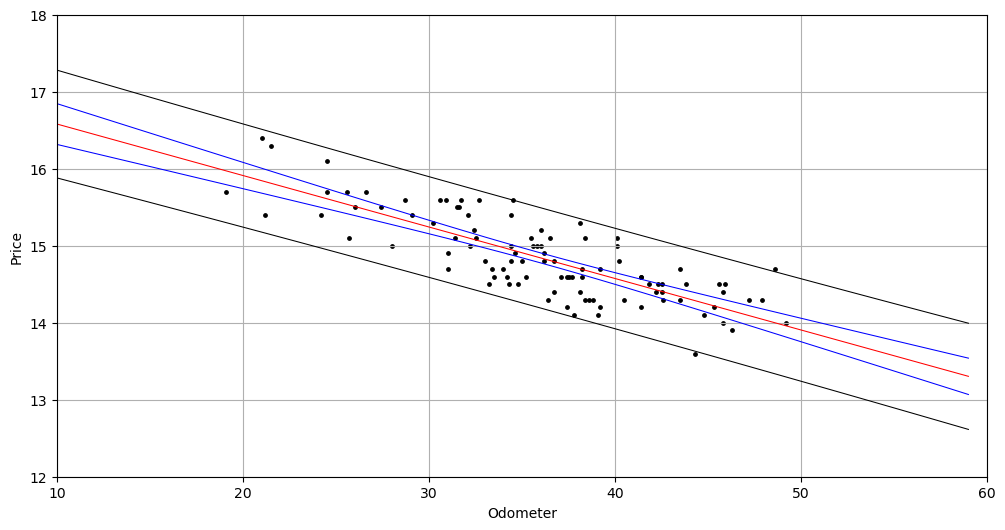

In [60]:
plt.figure(figsize=(12,6))
plt.scatter(Odometer,Price,s=6,c='k')
plt.xlim(10,60)
plt.ylim(12,18)
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.grid()

# plot regression line
plt.plot(xaxis,predictions,c='r',lw = 0.75)

# plot CIs -blue
plt.plot(xaxis,ci_lwr,c='b',lw=0.75)
plt.plot(xaxis,ci_upr,c='b',lw=0.75)

# plot PIs -black
plt.plot(xaxis,pi_lwr,c='k',lw=0.75)
plt.plot(xaxis,pi_upr,c='k',lw=0.75);

In [61]:
# add point identifiers (see last two commands)

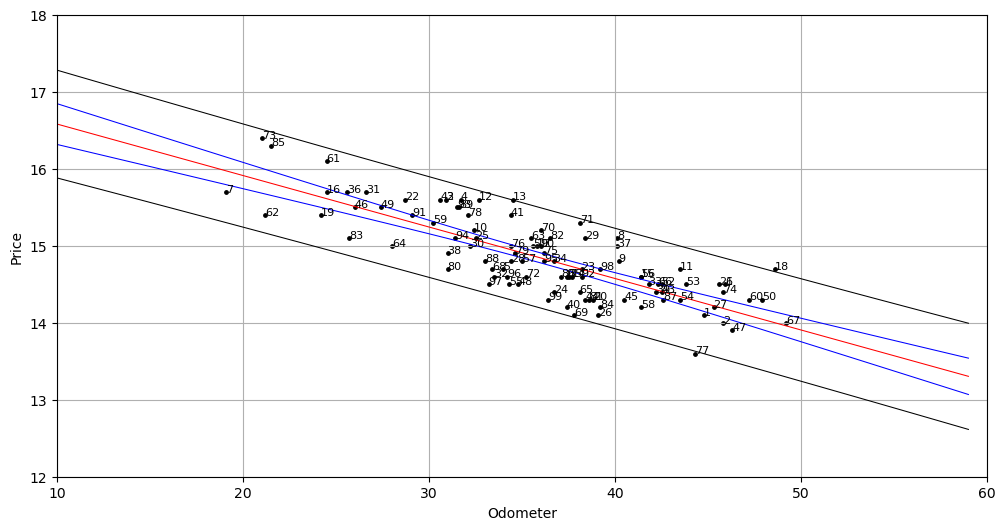

In [62]:
plt.figure(figsize=(12,6))
plt.scatter(Odometer,Price,s=6,c='k')
plt.xlim(10,60)
plt.ylim(12,18)
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.grid()

# plot regression line
plt.plot(xaxis,predictions,c='r',lw = 0.75)

# plot CIs -blue
plt.plot(xaxis,ci_lwr,c='b',lw=0.75)
plt.plot(xaxis,ci_upr,c='b',lw=0.75)

# plot PIs -black
plt.plot(xaxis,pi_lwr,c='k',lw=0.75)
plt.plot(xaxis,pi_upr,c='k',lw=0.75)

# add point labels
for i in range(100):
    plt.annotate(i,(Odometer.iloc[i],Price[i]),fontsize=8)

In [63]:
# rows 13, 18, and 77 mild outliers

In [64]:
df2 = df1.copy()
df2['fitted'] = m3.fittedvalues
df2['residual'] = m3.resid
df2[:5]

,Odometer,Price,fitted,residual
0,37.4,14.6,14.748130,-0.148130
1,44.8,14.1,14.253360,-0.153360
2,45.8,14.0,14.186499,-0.186499
3,30.9,15.6,15.182726,0.417274
4,31.7,15.6,15.129237,0.470763


In [65]:
df2.iloc[[13,18,77],]

,Odometer,Price,fitted,residual
13,34.5,15.6,14.942027,0.657973
18,48.6,14.7,13.999288,0.700712
77,44.3,13.6,14.286790,-0.686790
